# Structure de bande du MgCl2 (mp-570259)

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

### Structure de bande électronique du MgCl2

In [2]:
with MPRester("qpcDzlSRWPfs7J19") as m:
    bandstruct = m.get_bandstructure_by_material_id("mp-570259")

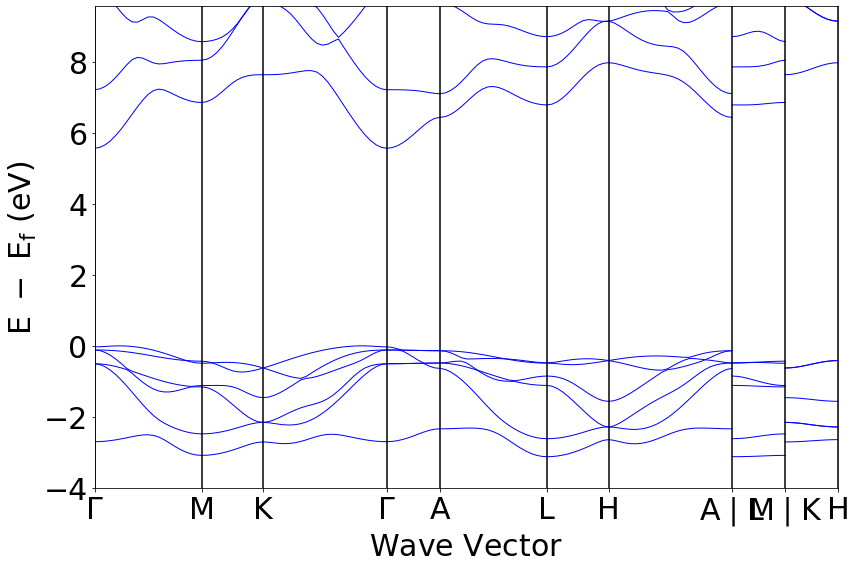

In [3]:
bsplotter = BSPlotter(bandstruct)
bsplotter.show()

### Détermination de la bande interdite

In [4]:
print(bandstruct.get_band_gap())

{'direct': False, 'energy': 5.5713, 'transition': '(0.072,0.072,0.000)-\\Gamma'}


La bande interdite est indirecte et a une énergie de 5.5713 eV. Le matériau est donc un isolant (bande interdite de l’ordre de 5-6 eV). Le fait que la bande soit indirecte signifie qu'il doit y avoir une interaction à la fois avec un photon et avec un phonon afin de modifier leur vecteur d'onde, ce qui rend la transition bien moins probable qu'un matériau à bande directe.

### Dispersion des bandes électroniques

In [5]:
dt = bsplotter.bs_plot_data()
En = dt.get('energy')
Dist = dt.get('ticks').get('distance')

Dist = np.array([Dist[0], Dist[1], Dist[3], Dist[5], Dist[7], Dist[9], Dist[11], Dist[13], Dist[14], Dist[15]])

In [6]:
# Distance entre chaque branche :
d = Dist[1:] - Dist[0:-1]

# Dernière bande de valence (10ème dans le cas du MgCl2), pente entre chaque branche :
penteV = np.zeros(np.shape(d))
for i in range(np.size(d)):
    penteV[i] = ((En[i].get('1')[10][-1]) - (En[i].get('1')[10][0]))/d[i]

# Première bande de conduction (11ème dans le cas du MgCl2), pente entre chaque branche :
penteC = np.zeros(np.shape(d))
for i in range(np.size(d)):
    penteC[i] = ((En[i].get('1')[11][-1]) - (En[i].get('1')[11][0]))/d[i]

In [7]:
maxV = np.max(abs(penteV))
minV = np.min(abs(penteV))
maxC = np.max(abs(penteC))
minC = np.min(abs(penteC))

Dernière bande de valence :
 
- Direction qui présente le plus de dispertion : K - Γ  (maxV= 0.521927103764777 )
- Direction qui présente le moins de dispertion : A|L - M|K  (minV= 0.0925100952435408 )
 
Première bande de conduction :
 
- Direction qui présente le plus de dispertion : L - H  (maxC= 2.088762150041687 )
- Direction qui présente le moins de dispertion : A|L - M|K  (minC= 0.14029676695874713 )


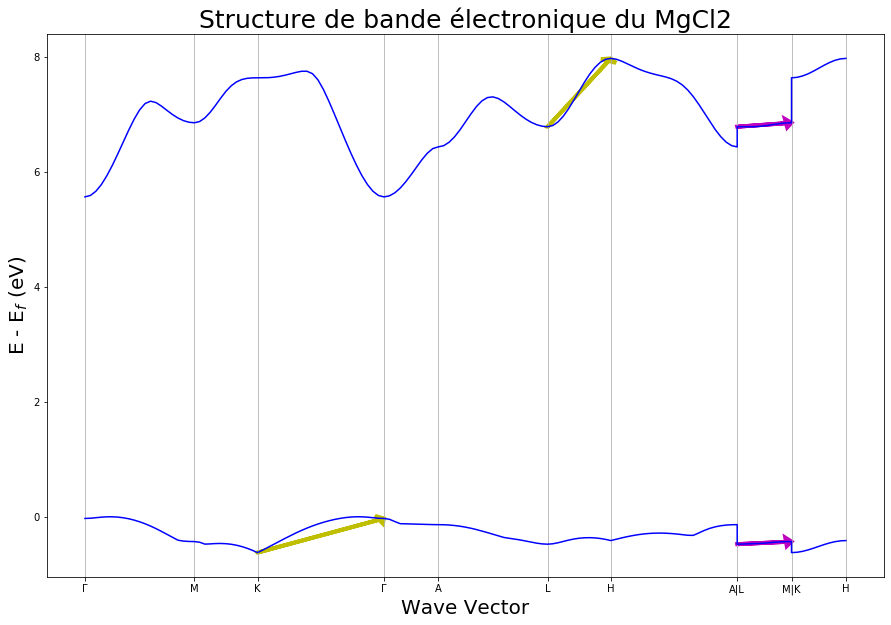

In [8]:
print("Dernière bande de valence :")
print(" ")
print("- Direction qui présente le plus de dispertion : K - \u0393 ","(maxV=",maxV,")")
print("- Direction qui présente le moins de dispertion : A|L - M|K ","(minV=",minV,")")
print(" ")
print("Première bande de conduction :")
print(" ")
print("- Direction qui présente le plus de dispertion : L - H ","(maxC=",maxC,")")
print("- Direction qui présente le moins de dispertion : A|L - M|K ","(minC=",minC,")")

a = dt.get('distances')
b = [y for x in a for y in x]
EnV = (En[0].get('1')[10] + En[1].get('1')[10] + En[2].get('1')[10] + En[3].get('1')[10] + En[4].get('1')[10]
       + En[5].get('1')[10] + En[6].get('1')[10] + En[7].get('1')[10] + En[8].get('1')[10])
EnC = (En[0].get('1')[11] + En[1].get('1')[11] + En[2].get('1')[11] + En[3].get('1')[11] + En[4].get('1')[11]
       + En[5].get('1')[11] + En[6].get('1')[11] + En[7].get('1')[11] + En[8].get('1')[11])

fig, axs = plt.subplots(1,1,figsize=(15,10))
plt.plot(b,EnV,"b-")
plt.plot(b,EnC,"b-")
axs.set_xticks(Dist)
axs.set_xticklabels(['\u0393','M','K','\u0393','A','L','H','A|L','M|K','H'])
plt.ylabel('E - E$_{f}$ (eV)',fontsize=20)
plt.xlabel('Wave Vector',fontsize=20)
plt.title('Structure de bande électronique du MgCl2',fontsize=25)
axes = plt.gca()
axes.xaxis.grid()

plt.arrow(Dist[2], En[2].get('1')[10][0], Dist[3] - Dist[2] ,  En[2].get('1')[10][-1] - En[2].get('1')[10][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='y', length_includes_head=True)
plt.arrow(Dist[7], En[7].get('1')[10][0], Dist[8] - Dist[7] ,  En[7].get('1')[10][-1] - En[7].get('1')[10][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='m', length_includes_head=True)

plt.arrow(Dist[5], En[5].get('1')[11][0], Dist[6] - Dist[5] ,  En[5].get('1')[11][-1] - En[5].get('1')[11][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='y', length_includes_head=True)
plt.arrow(Dist[7], En[7].get('1')[11][0], Dist[8] - Dist[7] ,  En[7].get('1')[11][-1] - En[7].get('1')[11][0],
          head_width=0.15, head_length=0.05, linewidth=4, color='m', length_includes_head=True)

plt.show()

Sur le graphe ci-dessus, on retrouve la dernière bande de valence et la première bande de conduction. 

Les flèches jaunes correspondent aux directions avec le plus de dispersion. On retrouve bien la direction K - Gamma pour la bande de valence et la direction L - H pour la bande de conduction. 

Les flèches mauves correspondent aux directions avec le moins de dispersion. On retrouve bien la direction A|L - M|K pour la bande de valence et la bande de conduction. 

### Masse effective

La formule pour calculer la masse effective m* est donnée par :

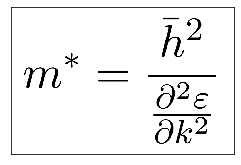

In [13]:
image_1=img.imread('Masse_effective.PNG')
fig, axes = plt.subplots(figsize=(4,4))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
axes.imshow(image_1)
plt.show()

où h_barre = 1.054571817E-34 J.s est la constante de Planck réduite et le terme au dénominateur est la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k.

Afin de calculer cette dérivée seconde, on considère une dispersion parabolique. Cette approximation parabolique est calculée à l'aide du maximum de valence (minimum de conduction) et un autre point appartenant à la bande électronique.

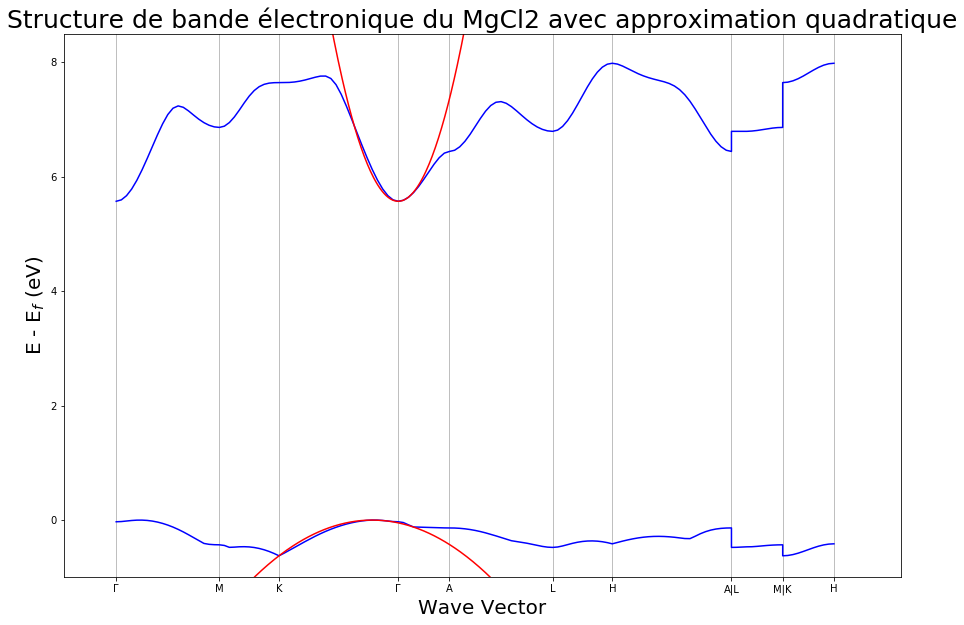

In [10]:
# Constante de Planck réduite [J.s]
h_barre = 1.054571817*(10**-34)
# Electron volt [J]
eV = 1.602176634*(10**-19)
# Angstrom [m]
A = 10**-10

# Dernière bande de valence
[x1,y1] = [a[2][18],En[2].get('1')[10][18]] # max de la courbe
[x2,y2] = [Dist[2],En[2].get('1')[10][0]] # autre point de la courbe
  # équation parabole : f(k) = mV*(k-pV)^2
mV = y2/(x2-x1)**2
pV = x1

def fV(x):
    return mV*(x-pV)**2

xV = np.arange(-1,10,0.01)
yV = fV(xV)

# Première bande de conduction
[x3,y3] = [a[2][-1],En[2].get('1')[11][-1]] # min de la courbe
[x4,y4] = [a[3][1],En[3].get('1')[11][1]] # autre point de la courbe
  # équation parabole : f(k) = mC*(k-pC)^2 + y3
mC = (y4-y3)/(x4-x3)**2
pC = x3

def fC(x):
    return mC*(x-pC)**2 + y3

xC = np.arange(-1,10,0.01)
yC = fC(xC)

# Figure
fig, axs = plt.subplots(1,1,figsize=(15,10))
plt.plot(b,EnV,"b-")
plt.plot(xV,yV,'r')
plt.plot(b,EnC,"b-")
plt.plot(xC,yC,'r')
axs.set_xticks(Dist)
axs.set_xticklabels(['\u0393','M','K','\u0393','A','L','H','A|L','M|K','H'])
plt.ylabel('E - E$_{f}$ (eV)',fontsize=20)
plt.xlabel('Wave Vector',fontsize=20)
plt.title('Structure de bande électronique du MgCl2 avec approximation quadratique',fontsize=25)
axes = plt.gca()
axes.xaxis.grid()
plt.xlim(-0.5,7.5)
plt.ylim(-1,8.5)
plt.show()

On peut dès lors effectuer le calcul de la masse effective grâce aux équations des approximations quadratiques.

Masse effective au sommet de la dernière bande de valence :

In [11]:
print('Equation de la parabole : f(k) = ', mV,'* ( k -',pV,')²')
print('Dérivée seconde de la parabole : f\'\'(k) = ', 2*mV,'[eV.A²]')
print("              où A = ",A,"[m], un Angstrom")
print(" ")
print('Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :')
print('f\'\'(k) = ',2*mV*(A**2)*eV, '[J.m²]')
print(" ")
print('La masse effective est donc :')
print('m* = ',abs((h_barre**2)/(2*mV*(A**2)*eV)),'[kg]')

Equation de la parabole : f(k) =  -0.7851176563244301 * ( k - 2.4478087779493802 )²
Dérivée seconde de la parabole : f''(k) =  -1.5702353126488602 [eV.A²]
              où A =  1e-10 [m], un Angstrom
 
Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :
f''(k) =  -2.5157943278076886e-39 [J.m²]
 
La masse effective est donc :
m* =  4.420558965882579e-30 [kg]


Masse effective à la base de la première bande de conduction :

In [12]:
print('Equation de la parabole : f(k) = ', mC,'* ( k -',pC,')² + ',y3)
print('Dérivée seconde de la parabole : f\'\'(k) = ', 2*mC,'[eV.A²]')
print("              où A = ",A,"[m], un Angstrom")
print(" ")
print('Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :')
print('f\'\'(k) = ',2*mC*(A**2)*eV, '[J.m²]')
print(" ")
print('La masse effective est donc :')
print('m* = ',(h_barre**2)/(2*mC*(A**2)*eV),'[kg]')

Equation de la parabole : f(k) =  7.465087165925757 * ( k - 2.6954695590933775 )² +  5.5713
Dérivée seconde de la parabole : f''(k) =  14.930174331851514 [eV.A²]
              où A =  1e-10 [m], un Angstrom
 
Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :
f''(k) =  2.3920776456039066e-38 [J.m²]
 
La masse effective est donc :
m* =  4.649187367535948e-31 [kg]
